In [21]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Varying C: Impact on Logistic Regression Performance

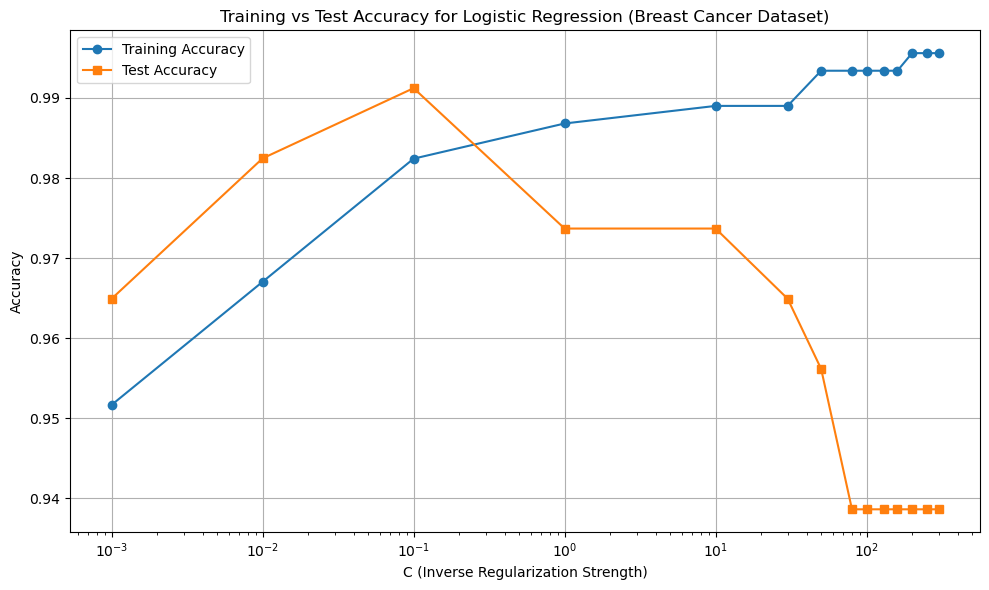

,C,train_accuracy,test_accuracy
0,0.001,0.951648,0.964912
1,0.010,0.967033,0.982456
2,0.100,0.982418,0.991228
3,1.000,0.986813,0.973684
4,10.000,0.989011,0.973684
5,30.000,0.989011,0.964912
6,50.000,0.993407,0.956140
7,80.000,0.993407,0.938596
8,100.000,0.993407,0.938596
9,130.000,0.993407,0.938596


In [3]:
C_values = [0.001, 0.01, 0.1, 1, 10, 30, 50, 80,100,130,160, 200,250, 300]
results = []

for C in C_values:
    model = LogisticRegression(C=C, solver='liblinear', penalty='l2', max_iter=500, random_state=0)
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    results.append({'C': C, 'train_accuracy': train_acc, 'test_accuracy': test_acc})


results_df = pd.DataFrame(results)

# Plot training and test accuracy
plt.figure(figsize=(10, 6))
plt.plot(results_df['C'], results_df['train_accuracy'], marker='o', label='Training Accuracy')
plt.plot(results_df['C'], results_df['test_accuracy'], marker='s', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy for Logistic Regression (Breast Cancer Dataset)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


results_df


### Varying penalties(l1, l2): Impact on Logistic Regression Performance

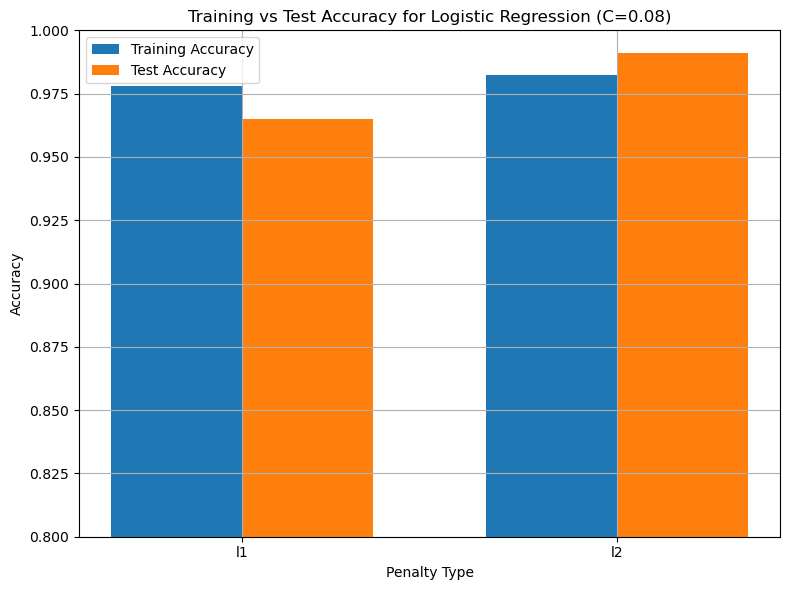

,penalty,train_accuracy,test_accuracy
0,l1,0.978022,0.964912
1,l2,0.982418,0.991228


In [5]:
penalties = ['l1', 'l2']
C_value = 0.08  
results = []

for penalty in penalties:
    model = LogisticRegression(C=C_value, solver='liblinear', penalty=penalty, max_iter=100, random_state=0)
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    results.append({'penalty': penalty, 'train_accuracy': train_acc, 'test_accuracy': test_acc})


results_df = pd.DataFrame(results)


plt.figure(figsize=(8, 6))
bar_width = 0.35
x = range(len(results_df['penalty']))

plt.bar(x, results_df['train_accuracy'], width=bar_width, label='Training Accuracy')
plt.bar([p + bar_width for p in x], results_df['test_accuracy'], width=bar_width, label='Test Accuracy')

plt.xticks([p + bar_width / 2 for p in x], results_df['penalty'])
plt.ylim(0.8, 1.0)
plt.xlabel('Penalty Type')
plt.ylabel('Accuracy')
plt.title(f'Training vs Test Accuracy for Logistic Regression (C={C_value})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


results_df


### Varying Solvers and C Values with Fixed L2 (Ridge) Penalty: Impact on Model Performance

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


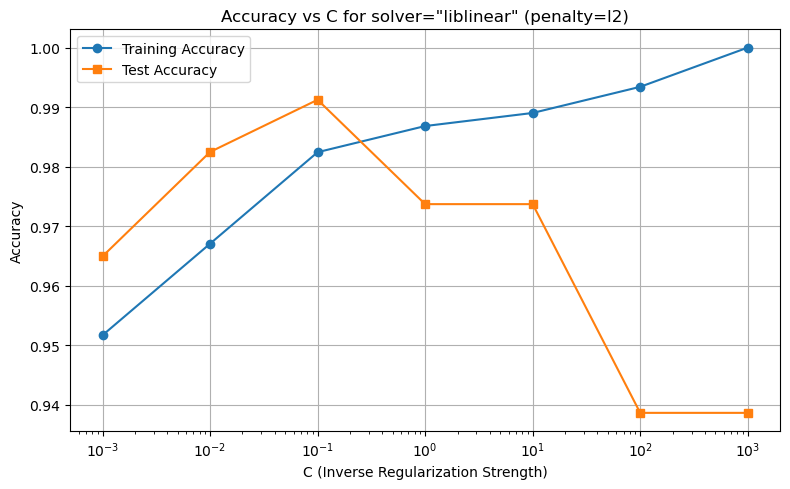

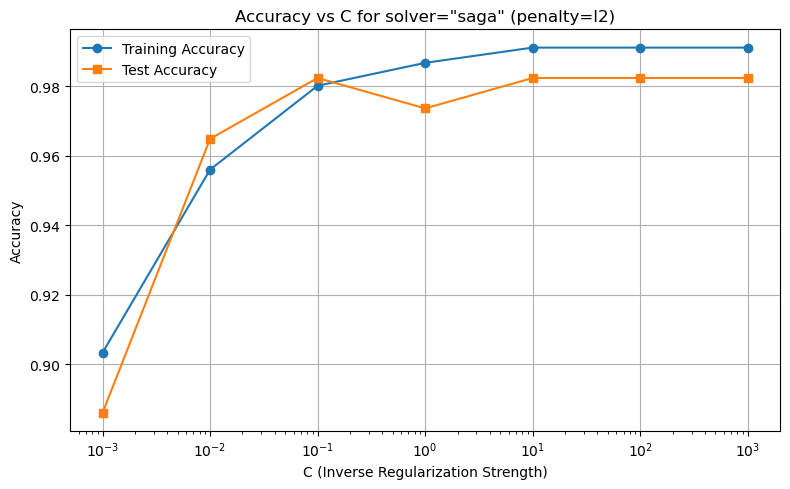

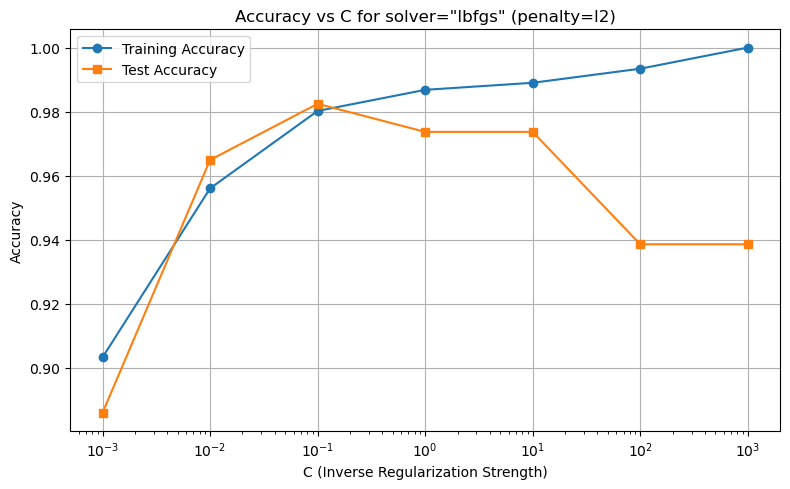

In [19]:
solvers = ['liblinear', 'saga', 'lbfgs']
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty = 'l2'  # common penalty supported by all

results = []

for solver in solvers:
    for C in C_values:
        try:
            model = LogisticRegression(
                C=C,
                solver=solver,
                penalty=penalty,
                max_iter=500,
                random_state=0
            )
            model.fit(X_train_scaled, y_train)
            y_train_pred = model.predict(X_train_scaled)
            y_test_pred = model.predict(X_test_scaled)
            train_acc = accuracy_score(y_train, y_train_pred)
            test_acc = accuracy_score(y_test, y_test_pred)
            results.append({
                'solver': solver,
                'C': C,
                'train_accuracy': train_acc,
                'test_accuracy': test_acc
            })
        except Exception as e:
            print(f"Solver '{solver}' with C={C} failed: {e}")

results_df = pd.DataFrame(results)


for solver in solvers:
    subset = results_df[results_df['solver'] == solver]
    
    plt.figure(figsize=(8, 5))
    plt.plot(subset['C'], subset['train_accuracy'], marker='o', label='Training Accuracy')
    plt.plot(subset['C'], subset['test_accuracy'], marker='s', label='Test Accuracy')
    plt.xscale('log')
    plt.xlabel('C (Inverse Regularization Strength)')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs C for solver="{solver}" (penalty={penalty})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [33]:
results_df

,solver,C,train_accuracy,test_accuracy
0,liblinear,0.001,0.951648,0.964912
1,liblinear,0.010,0.967033,0.982456
2,liblinear,0.100,0.982418,0.991228
3,liblinear,1.000,0.986813,0.973684
4,liblinear,10.000,0.989011,0.973684
5,liblinear,100.000,0.993407,0.938596
6,liblinear,1000.000,1.000000,0.938596
7,saga,0.001,0.903297,0.885965
8,saga,0.010,0.956044,0.964912
9,saga,0.100,0.980220,0.982456
